<a href="https://colab.research.google.com/github/tommasomncttn/NLP-Disaster-Tweet-Detection/blob/main/TORUN_GPU_LogisticRegression(SKLEARN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space

In [4]:
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv("/content/drive/MyDrive/ML_proj/zaazazza/Copia de train_df.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ML_proj/zaazazza/Copia de test_df.csv")
df_val = pd.read_csv("/content/drive/MyDrive/ML_proj/zaazazza/Copia de validation_df.csv")

In [6]:
# Extracting the text and target labels from the training and testing data
train_text = df_train["text"]
train_lable = df_train["target"]

test_text = df_test["text"]
test_lable = df_test["target"]

df_val.drop(columns = ["Unnamed: 0", "id", "keyword", "location"])


# Creating a CountVectorizer object to convert the text into a matrix of token counts
vect = CountVectorizer(stop_words='english')

# Fitting the CountVectorizer on the training data to learn the vocabulary and create a document-term matrix
vectorized_train = vect.fit_transform(train_text)

# Creating a logistic regression model
model = LogisticRegression(max_iter = 500, solver = "lbfgs")


In [7]:
# Defining the hyperparameter grid
param_grid = {'C': Continuous(0.01, 10000), 'penalty': Categorical(['l2', None])}

# Performing the hyperparameter search using GASearchCV
model_H = GASearchCV(model,  cv = 3, param_grid = param_grid,  scoring="accuracy", population_size=5, generations = 1, verbose = True) #TODO: change numbers of pop and gen (20 and 50 ish)
model_H.fit(vectorized_train, train_lable)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	5     	0.764245	0.00389789 	0.769704   	0.761084   


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

1  	10    	0.767447	0.00320618 	0.769294   	0.761084   


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GASearchCV(estimator=LogisticRegression(C=3853.9775705048037, max_iter=500),
           generations=1,
           param_grid={'C': <sklearn_genetic.space.space.Continuous object at 0x7f0acae91400>,
                       'penalty': <sklearn_genetic.space.space.Categorical object at 0x7f0acae91490>},
           population_size=5, return_train_score=True, scoring='accuracy')

Best parameters {'C': 3853.9775705048037, 'penalty': 'l2'}


/usr/local/lib/python3.9/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


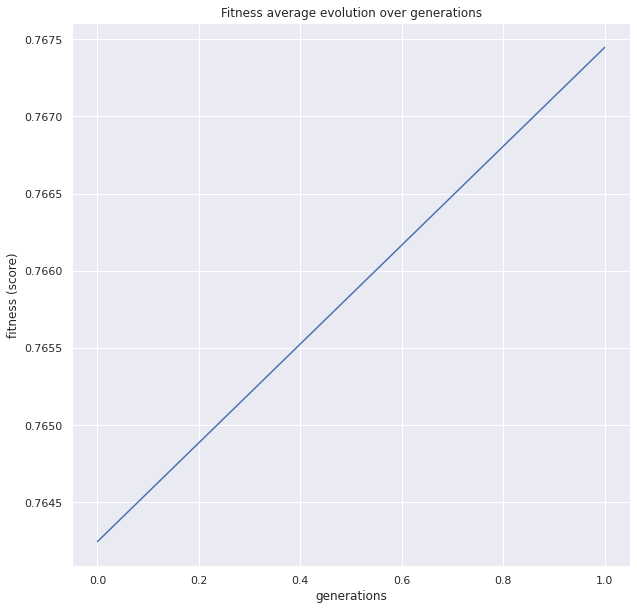

In [8]:
print("Best parameters", model_H.best_params_)
plot_fitness_evolution(model_H)
plt.show()

In [10]:
# Vectorizing the test data using the same vocabulary as the training data
vectorized_test = vect.transform(test_text)

# Making predictions on the test data using the trained model
predicted_lables = model_H.predict(vectorized_test)

# Evaluating the performance of the model using accuracy score and confusion matrix
accuracy = accuracy_score(test_lable, predicted_lables)
confusion = confusion_matrix(test_lable, predicted_lables)
f1 = f1_score(test_lable, predicted_lables)

# Printing the accuracy and confusion matrix of the model
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("F1 score:", f1)

NameError: ignored

In [12]:
# Define the number of folds to use for cross-validation
num_folds = 5

# Create a KFold object to split the data into K folds
kf = KFold(n_splits=num_folds, shuffle=True)

# Create an empty list to store F1 scores for each fold
f1_scores = []

# Loop over each fold and train the model on the training data, then evaluate on the validation data
for fold, (train_indices, val_indices) in enumerate(kf.split(vectorized_train, train_lable)):

    # Split the data into training and validation sets for this fold
    X_train, y_train = vectorized_train[train_indices], train_lable[train_indices]
    X_val, y_val = vectorized_train[val_indices], train_lable[val_indices]

    # Fit a logistic regression model on the training data
    model_H.fit(X_train, y_train)

    # Make predictions on the validation data using the trained model
    predicted_labels = model.predict(X_val)

    # Evaluate the performance of the model using F1 score
    f1 = f1_score(predicted_labels, y_val) 

    # Add the F1 score for this fold to the list
    f1_scores.append(f1)

    # Print the F1 score for this fold
    print(f"Fold {fold}: F1 score = {f1}")

# Calculate the average F1 score across all folds
avg_score = np.mean(f1_scores)
print(f"Average F1 score across {num_folds} folds: {avg_score}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	5     	0.764537	0.00107162 	0.765974   	0.763664   


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

1  	10    	0.765974	0.000324586	0.76623    	0.765461   


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fold 0: F1 score = 0.7007874015748031


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP:

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	5     	0.75417	0.00102643 	0.756223   	0.753657   


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

KeyboardInterrupt: ignored